In [ ]:
Extra Question 1 (2’) (Extra: means it is optional for you to do)
Given an integer array nums, find the contiguous subarray (containing at least one number) which has the largest sum and return its sum.
Example:
Input: nums = [-2,1,-3,4,-1,2,1,-5,4]
Output: 6
Explanation: [4,-1,2,1] has the largest sum = 6.

You may design your input to test it.

In [16]:
# Python program to print largest contiguous array sum
 
from sys import maxsize
 
# Function to find the maximum contiguous subarray and print its starting and end index
 
def maxSubArraySum(nums, size):
 
    max_so_far = -maxsize - 1
    max_ending_here = 0
    start = 0
    end = 0
    s = 0
 
    for i in range(0, size):
 
        max_ending_here += a[i]
 
        if max_so_far < max_ending_here:
            max_so_far = max_ending_here
            start = s
            end = i
 
        if max_ending_here < 0:
            max_ending_here = 0
            s = i+1
 
    print("Maximum contiguous sum is %d" % (max_so_far))
    print("Starting Index %d" % (start))
    print("Ending Index %d" % (end))
 
 
# Driver program to test maxSubArraySum
nums = [-2, -3, 4, -1, -2, 1, 5, -3]
maxSubArraySum(nums, len(nums))

Maximum contiguous sum is 7
Starting Index 2
Ending Index 6


Extra Question 2 (2’)

You are given an array of k linked-lists lists, each linked-list is sorted in ascending order.
Merge all the linked-lists into one sorted linked-list and return it.
Example:
Input: lists = [[1,4,5],[1,3,4],[2,6]]
Output: [1,1,2,3,4,4,5,6]
Modify the “solution” class in extra_question2.py, you may design your input to test it.

In [19]:
# Python3 program to merge k sorted arrays of size n each
 
# A Linked List node
class Node:
 
    def __init__(self):
 
        self.data = 0
        self.next = None
 
# Function to print nodes in a
# given linked list
def printList(node):
 
    while (node != None):
        print(node.data, end=' ')
        node = node.next
 
# Takes two lists sorted in increasing order, and merge their nodes together to make one
# big sorted list. Below function takes O(Log n) extra space for recursive calls,
# but it can be easily modified to work with same time and O(1) extra space

def SortedMerge(a, b):
 
    result = None
 
    # Base cases
    if (a == None):
        return(b)
    elif (b == None):
        return(a)
 
    # Pick either a or b, and recur
    if (a.data <= b.data):
        result = a
        result.next = SortedMerge(a.next, b)
    else:
        result = b
        result.next = SortedMerge(a, b.next)
 
    return result
 
# The main function that takes an array of lists
# arr[0..last] and generates the sorted output
def mergeKLists(arr, last):
 
    # Repeat until only one list is left
    while (last != 0):
        i = 0
        j = last
 
        # (i, j) forms a pair
        while (i < j):
 
            # Merge List i with List j and store
            # merged list in List i
            arr[i] = SortedMerge(arr[i], arr[j])
 
            # Consider next pair
            i += 1
            j -= 1
 
            # If all pairs are merged, update last
            if (i >= j):
                last = j
 
    return arr[0]
 
# Utility function to create a new node.
def newNode(data):
 
    temp = Node()
    temp.data = data
    temp.next = None
    return temp
 
 
# Driver code
if __name__ == '__main__':
 
    # Number of linked lists
    k = 3
 
    # Number of elements in each list
    n = 4
 
    # An array of pointers storing the
    # head nodes of the linked lists
    arr = [0 for i in range(k)]
 
    arr[0] = newNode(1)
    arr[0].next = newNode(3)
    arr[0].next.next = newNode(5)
    arr[0].next.next.next = newNode(7)
 
    arr[1] = newNode(2)
    arr[1].next = newNode(4)
    arr[1].next.next = newNode(6)
    arr[1].next.next.next = newNode(8)
 
    arr[2] = newNode(0)
    arr[2].next = newNode(9)
    arr[2].next.next = newNode(10)
    arr[2].next.next.next = newNode(11)
 
    # Merge all lists
    head = mergeKLists(arr, k - 1)
 
    printList(head)

0 1 2 3 4 5 6 7 8 9 10 11 

Extra Question 3 (2’)

Write a NumPy program to get the values and indices of the elements that are bigger than 10 in a given array. - Modify the extra_question3.py

In [23]:
import numpy as np
element = np.array([[0, 10, 20], [20, 30, 40], [60, 70, 80]])

print("Original array: ")

print(element)

print("Values bigger than 10 =", element[element>10])

print("Their indices are ", np.nonzero(element> 10))

Original array: 
[[ 0 10 20]
 [20 30 40]
 [60 70 80]]
Values bigger than 10 = [20 20 30 40 60 70 80]
Their indices are  (array([0, 1, 1, 1, 2, 2, 2]), array([2, 0, 1, 2, 0, 1, 2]))


Extra Question 4 (2’)
Use template matching with OpenCV to find Messi’s face in an image, try all 6 methods and plot the result. - Modify the extra_question4/code.py

In [29]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('home\jyoti\Downloads\messi5.jpg',0)
img2 = img.copy()
template = cv.imread('template.jpg',0)
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

AttributeError: ignored

Extra Question 5 (2’)

Write a NumPy program to add, subtract, multiply, divide two arrays element-wise.
After you import numpy
The first step is to use NumPy to create two arrays: a, b
	a and b should be the same dimensioned.
	You initialize the values for a and b when you use numpy.array to create them.
Then a and b can apply the +  -  * / , like in the ways that two integers can do.
	numpy will do the corresponding element-wise math operations implicitly.
Please do it for both a and b for two cases: they are 1D arrays and 2D arrays, such as a and b both are 4x1, and both are 4x4.

In [33]:
# Case1:

import numpy as np

a = [10, 80, 30, 40]
b = [60, 20, 10, 30]

print("Add_case1:")
print(np.add(a, b))

print("Subtract_case1:")
print(np.subtract(a, b))

print("Multiply_case1:")
print(np.multiply(a, b))

print("Divide_case1:")
print(np.divide(a, b))

Add_case1:
[ 70 100  40  70]
Subtract_case1:
[-50  60  20  10]
Multiply_case1:
[ 600 1600  300 1200]
Divide_case1:
[0.16666667 4.         3.         1.33333333]


In [36]:
# Case2:

import numpy as np

a = [[10, 80, 30, 40], [50, 60, 70, 80], [90, 60, 30, 10], [60, 10, 30, 80]]
b = [[60, 20, 10, 30], [20, 10, 40, 30], [80, 70, 10, 20], [60, 50, 80, 10]]

print("Add_case2:")
print(np.add(a, b))

print("Subtract_case2:")
print(np.subtract(a, b))

print("Multiply_case2:")
print(np.multiply(a, b))

print("Divide_case2:")
print(np.divide(a, b))

Add_case2:
[[ 70 100  40  70]
 [ 70  70 110 110]
 [170 130  40  30]
 [120  60 110  90]]
Subtract_case2:
[[-50  60  20  10]
 [ 30  50  30  50]
 [ 10 -10  20 -10]
 [  0 -40 -50  70]]
Multiply_case2:
[[ 600 1600  300 1200]
 [1000  600 2800 2400]
 [7200 4200  300  200]
 [3600  500 2400  800]]
Divide_case2:
[[0.16666667 4.         3.         1.33333333]
 [2.5        6.         1.75       2.66666667]
 [1.125      0.85714286 3.         0.5       ]
 [1.         0.2        0.375      8.        ]]


Extra Question 6 (2’)

Use SciPy for an application of Discrete Fourier Transform (DFT), modify the extra_question6.py, and apply DFT to the array “a” and visualize both original and result signals.

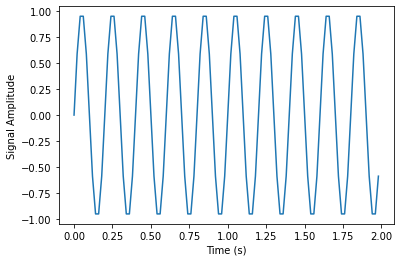

<ipython-input-37-cc26e9c178df>:25: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(freq, abs(m), 'b', \


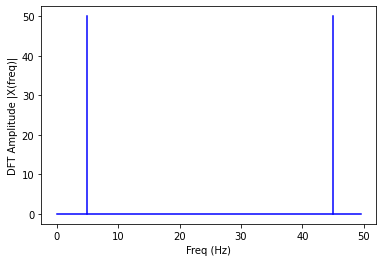

In [37]:
from matplotlib import pyplot as plt
import numpy as np 
import scipy

#Frequency in terms of Hertz
freq  = 5 
#Sample rate
freq_samp = 50
t = np.linspace(0, 2, 2 * freq_samp, endpoint = False )
a = np.sin(freq  * 2 * np.pi * t)
figure, axis = plt.subplots()
axis.plot(t, a)
axis.set_xlabel ('Time (s)')
axis.set_ylabel ('Signal Amplitude')
plt.show()

#do DFT and visualize:
from scipy.fft import fft
m = fft(a)

N = len(m)
n = np.arange(N)
T = N/freq_samp
freq = n/T 
plt.stem(freq, abs(m), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.show() 